In [357]:
#Dependencies
import pandas as pd
import urllib.parse
from io import StringIO
import datetime
import calendar
import time
import os
from data_utils import establish_nys_session
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')

Read the CSVs into a pandas df

In [365]:
folder_path = 'Ressources/'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []  # List to hold all dataframes

for file in files:
    file_path = os.path.join(folder_path, file)  # Full path to file
    df = pd.read_csv(file_path)  # Read the file into a DataFrame
    dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df

,date,station_complex,borough,payment_method,total_ridership,lat,lng
0,2023-01-01,103 St (1),Manhattan,metrocard,2385,40.799446,-73.968376
1,2023-01-01,103 St (1),Manhattan,omny,2115,40.799446,-73.968376
2,2023-01-01,103 St (6),Manhattan,metrocard,1790,40.790600,-73.947479
3,2023-01-01,103 St (6),Manhattan,omny,1043,40.790600,-73.947479
4,2023-01-01,"103 St (C,B)",Manhattan,metrocard,830,40.796093,-73.961456
...,...,...,...,...,...,...,...
671471,2024-04-05,WTC Cortlandt (1),Manhattan,omny,6646,40.711834,-74.012190
671472,2024-04-05,York St (F),Brooklyn,metrocard,3884,40.701397,-73.986750
671473,2024-04-05,York St (F),Brooklyn,omny,6378,40.701397,-73.986750
671474,2024-04-05,Zerega Av (6),Bronx,metrocard,1032,40.836487,-73.847040


What are the most popular stations per Year?

Comparaison of the total rideship per year

In [367]:
#add year column
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['year']=combined_df['date'].dt.strftime('%y')
combined_df

,date,station_complex,borough,payment_method,total_ridership,lat,lng,year
0,2023-01-01,103 St (1),Manhattan,metrocard,2385,40.799446,-73.968376,23
1,2023-01-01,103 St (1),Manhattan,omny,2115,40.799446,-73.968376,23
2,2023-01-01,103 St (6),Manhattan,metrocard,1790,40.790600,-73.947479,23
3,2023-01-01,103 St (6),Manhattan,omny,1043,40.790600,-73.947479,23
4,2023-01-01,"103 St (C,B)",Manhattan,metrocard,830,40.796093,-73.961456,23
...,...,...,...,...,...,...,...,...
671471,2024-04-05,WTC Cortlandt (1),Manhattan,omny,6646,40.711834,-74.012190,24
671472,2024-04-05,York St (F),Brooklyn,metrocard,3884,40.701397,-73.986750,24
671473,2024-04-05,York St (F),Brooklyn,omny,6378,40.701397,-73.986750,24
671474,2024-04-05,Zerega Av (6),Bronx,metrocard,1032,40.836487,-73.847040,24


In [368]:

per_year_df=combined_df.groupby(['year'])[['total_ridership']].sum()
per_year_df_new = per_year_df.reset_index()
per_year_df_new
per_year_df_new1 = per_year_df_new.loc[(per_year_df_new["year"]!="24")]
per_year_df_new1

,year,total_ridership
0,22,948902207
1,23,1161407271


In [369]:

#years = per_year_df_new1 ["year"]
years=["2022","2023"]
ridership = per_year_df_new1 ["total_ridership"]
ridership
colors = [ "lightcoral", "lightskyblue"]
explode = (0, 0.05)

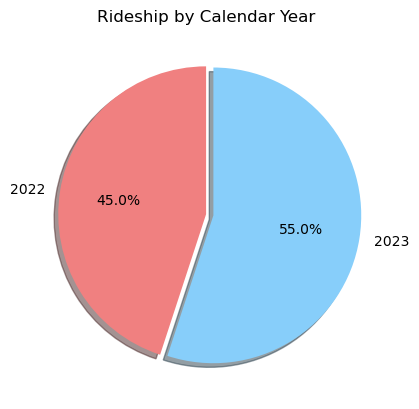

In [430]:
plt.title("Rideship by Calendar Year")
plt.pie(ridership, explode=explode, labels=years, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.savefig("Ressources/Fig1.png")
plt.show()

In [425]:
#add year column
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['year']=combined_df['date'].dt.strftime('%y')

#group by year , station_comp
mta_grouped_df=combined_df.groupby(['year','station_complex'])[['total_ridership']].sum()
top10_each_year = mta_grouped_df['total_ridership'].groupby(level=0, group_keys=False).nlargest(10)
df_new = top10_each_year.reset_index()
df_new


,year,station_complex,total_ridership
0,22,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",33198189
1,22,"Grand Central-42 St (S,4,5,6,7)",21809500
2,22,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",19510281
3,22,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",16772703
4,22,"Fulton St (A,C,J,Z,2,3,4,5)",13991432
5,22,"34 St-Penn Station (A,C,E)",13515515
6,22,"59 St-Columbus Circle (A,B,C,D,1)",12877569
7,22,"34 St-Penn Station (1,2,3)",12653129
8,22,Flushing-Main St (7),11009852
9,22,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",10950178


In [426]:
#PIVOTING
pivot_df=df_new.pivot_table(index='station_complex', columns='year', values='total_ridership')
pivot_df

year,22,23,24
station_complex,,,
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",16772703.0,21567705.0,5766447.0
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",19510281.0,23599714.0,6167118.0
"34 St-Penn Station (1,2,3)",12653129.0,15382164.0,4011381.0
"34 St-Penn Station (A,C,E)",13515515.0,17083725.0,4733540.0
"59 St-Columbus Circle (A,B,C,D,1)",12877569.0,15850140.0,4294425.0
"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)",10950178.0,14312788.0,3959771.0
Flushing-Main St (7),11009852.0,13964671.0,3732182.0
"Fulton St (A,C,J,Z,2,3,4,5)",13991432.0,17876582.0,4759010.0
"Grand Central-42 St (S,4,5,6,7)",21809500.0,30742547.0,8544898.0


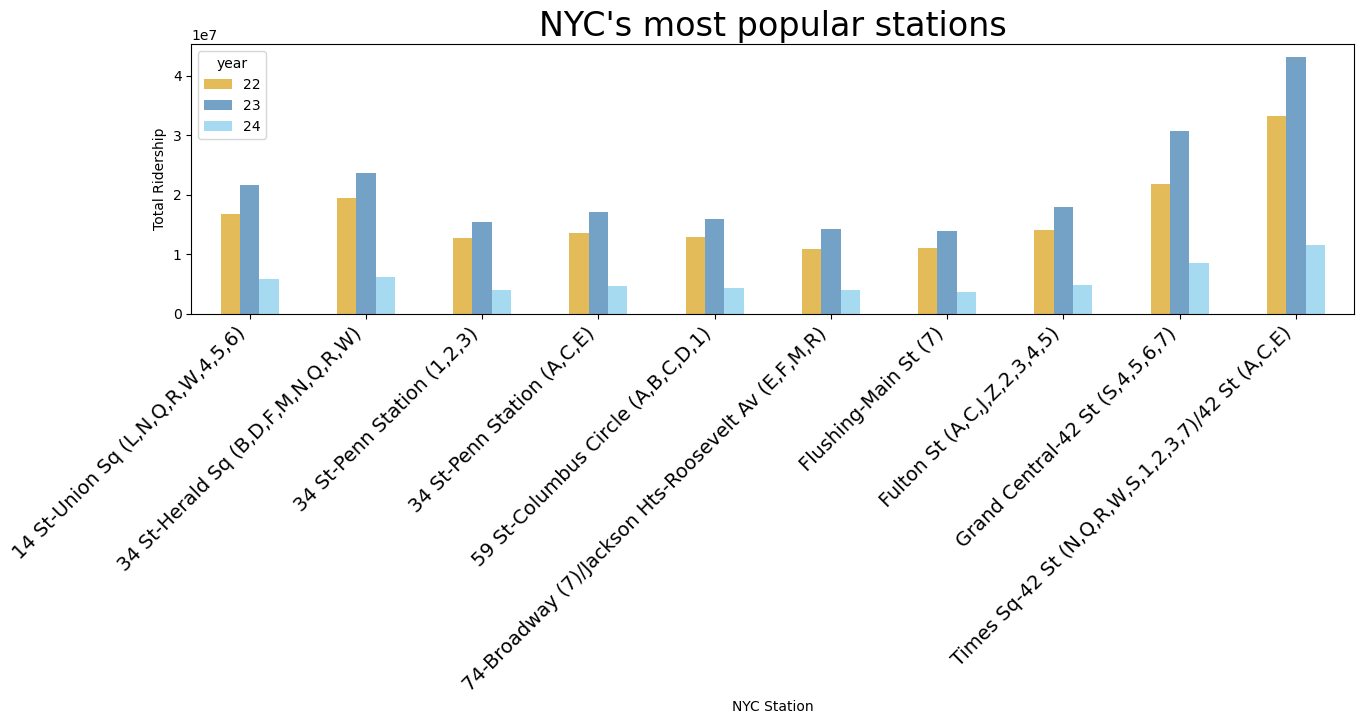

In [431]:
station_plot=pivot_df.plot(kind="bar",figsize=(15,3.5), alpha=0.75, align="center",color=['goldenrod', 'steelblue', 'skyblue'])
plt.title("NYC's most popular stations",fontsize=24)
#station_plot.set_xticklabels(pivot_df['station_complex'], rotation=60)
plt.xticks(rotation=45, ha='right',fontsize=14)
plt.xlabel("NYC Station")
plt.ylabel("Total Ridership")
#plt.tight_layout()
plt.savefig("Ressources/Fig2.png", bbox_inches = 'tight')
plt.show()

What are the most popular stations each day of the week

In [432]:
combined_df

,date,station_complex,borough,payment_method,total_ridership,lat,lng,year,day_of_week,month
0,2023-01-01,103 St (1),Manhattan,metrocard,2385,40.799446,-73.968376,23,Sunday,01-23
1,2023-01-01,103 St (1),Manhattan,omny,2115,40.799446,-73.968376,23,Sunday,01-23
2,2023-01-01,103 St (6),Manhattan,metrocard,1790,40.790600,-73.947479,23,Sunday,01-23
3,2023-01-01,103 St (6),Manhattan,omny,1043,40.790600,-73.947479,23,Sunday,01-23
4,2023-01-01,"103 St (C,B)",Manhattan,metrocard,830,40.796093,-73.961456,23,Sunday,01-23
...,...,...,...,...,...,...,...,...,...,...
671471,2024-04-05,WTC Cortlandt (1),Manhattan,omny,6646,40.711834,-74.012190,24,Friday,04-24
671472,2024-04-05,York St (F),Brooklyn,metrocard,3884,40.701397,-73.986750,24,Friday,04-24
671473,2024-04-05,York St (F),Brooklyn,omny,6378,40.701397,-73.986750,24,Friday,04-24
671474,2024-04-05,Zerega Av (6),Bronx,metrocard,1032,40.836487,-73.847040,24,Friday,04-24


In [433]:
#combined_df.groupby(['year','day_of_week'])['total_ridership'].sum()

In [434]:
# convert date to day of the week 
combined_df['day_of_week'] = combined_df['date'].dt.day_name()
mta_dayofweek_df=combined_df.groupby(['year','day_of_week'])['total_ridership'].sum()
new_day_of_week_df = mta_dayofweek_df.reset_index()
new_day_of_week_df

,year,day_of_week,total_ridership
0,22,Friday,152621345
1,22,Monday,137096959
2,22,Saturday,99657092
3,22,Sunday,78173549
4,22,Thursday,160946797
5,22,Tuesday,158025651
6,22,Wednesday,162380814
7,23,Friday,181159494
8,23,Monday,168155384
9,23,Saturday,123319668


In [445]:
pivot_df2=new_day_of_week_df.pivot_table(index='day_of_week', columns='year', values='total_ridership')
pivot_df2.sort_values(by=['day_of_week'], inplace=True)
#m = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#sorted=sorted(pivot_df2['day_of_week'],key=m.index)
pivot_df2

year,22,23,24
day_of_week,,,
Friday,152621345.0,181159494.0,49315987.0
Monday,137096959.0,168155384.0,44367601.0
Saturday,99657092.0,123319668.0,29225497.0
Sunday,78173549.0,98279180.0,23386655.0
Thursday,160946797.0,196504975.0,54293193.0
Tuesday,158025651.0,194588231.0,50986415.0
Wednesday,162380814.0,199400339.0,53897050.0


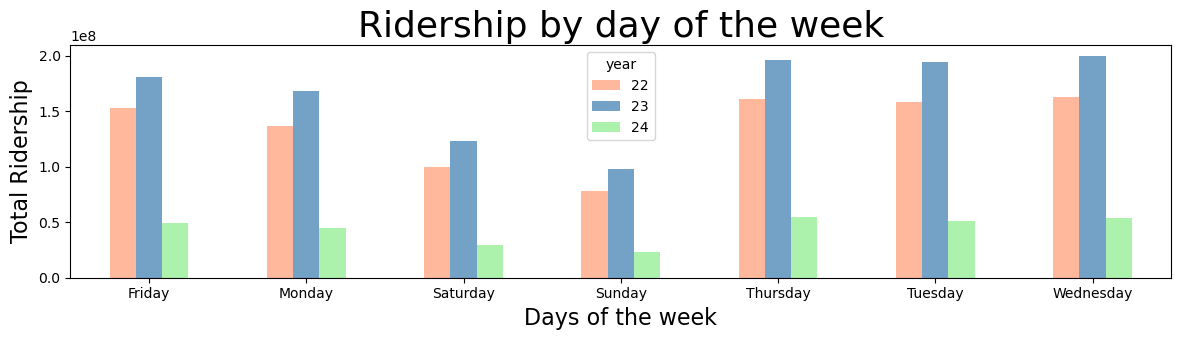

In [436]:
pivot_df2.plot(kind="bar", figsize=(12,3.5), alpha=0.75, align="center",color=['lightsalmon', 'steelblue', 'lightgreen'], rot=0 )
plt.title("Ridership by day of the week",fontsize=26)
plt.xlabel("Days of the week",fontsize=16)
plt.ylabel("Total Ridership",fontsize=16)
plt.tight_layout()
plt.savefig("Ressources/Fig3.png", bbox_inches = 'tight')
plt.show()

Compare the amount of ridership between 2022 and 2023

What is the correlation between omny users vs metrocard users over 2022-2023 

In [437]:
combined_df

,date,station_complex,borough,payment_method,total_ridership,lat,lng,year,day_of_week,month
0,2023-01-01,103 St (1),Manhattan,metrocard,2385,40.799446,-73.968376,23,Sunday,01-23
1,2023-01-01,103 St (1),Manhattan,omny,2115,40.799446,-73.968376,23,Sunday,01-23
2,2023-01-01,103 St (6),Manhattan,metrocard,1790,40.790600,-73.947479,23,Sunday,01-23
3,2023-01-01,103 St (6),Manhattan,omny,1043,40.790600,-73.947479,23,Sunday,01-23
4,2023-01-01,"103 St (C,B)",Manhattan,metrocard,830,40.796093,-73.961456,23,Sunday,01-23
...,...,...,...,...,...,...,...,...,...,...
671471,2024-04-05,WTC Cortlandt (1),Manhattan,omny,6646,40.711834,-74.012190,24,Friday,04-24
671472,2024-04-05,York St (F),Brooklyn,metrocard,3884,40.701397,-73.986750,24,Friday,04-24
671473,2024-04-05,York St (F),Brooklyn,omny,6378,40.701397,-73.986750,24,Friday,04-24
671474,2024-04-05,Zerega Av (6),Bronx,metrocard,1032,40.836487,-73.847040,24,Friday,04-24


In [438]:
combined_df['month']=combined_df['date'].dt.strftime('%m-%y')
combined_df

,date,station_complex,borough,payment_method,total_ridership,lat,lng,year,day_of_week,month
0,2023-01-01,103 St (1),Manhattan,metrocard,2385,40.799446,-73.968376,23,Sunday,01-23
1,2023-01-01,103 St (1),Manhattan,omny,2115,40.799446,-73.968376,23,Sunday,01-23
2,2023-01-01,103 St (6),Manhattan,metrocard,1790,40.790600,-73.947479,23,Sunday,01-23
3,2023-01-01,103 St (6),Manhattan,omny,1043,40.790600,-73.947479,23,Sunday,01-23
4,2023-01-01,"103 St (C,B)",Manhattan,metrocard,830,40.796093,-73.961456,23,Sunday,01-23
...,...,...,...,...,...,...,...,...,...,...
671471,2024-04-05,WTC Cortlandt (1),Manhattan,omny,6646,40.711834,-74.012190,24,Friday,04-24
671472,2024-04-05,York St (F),Brooklyn,metrocard,3884,40.701397,-73.986750,24,Friday,04-24
671473,2024-04-05,York St (F),Brooklyn,omny,6378,40.701397,-73.986750,24,Friday,04-24
671474,2024-04-05,Zerega Av (6),Bronx,metrocard,1032,40.836487,-73.847040,24,Friday,04-24


In [439]:
grouped_month=combined_df.groupby(["month","payment_method"])[["total_ridership"]].sum()
grouped_month=grouped_month.reset_index()
grouped_month.head()
grouped_month_metrocard=grouped_month.loc[grouped_month["payment_method"]=="metrocard"]
grouped_month_omny=grouped_month.loc[grouped_month["payment_method"]=="omny"]


In [440]:
grouped_month_metrocard['month'] = pd.to_datetime(grouped_month_metrocard['month'], format='%m-%y')
grouped_month_metrocard['formatted_date'] = grouped_month_metrocard['month'].dt.strftime('%B-%Y')
grouped_month_metrocard.sort_values(by=['month'], inplace=True)

grouped_month_omny['month'] = pd.to_datetime(grouped_month_omny['month'], format='%m-%y')
grouped_month_omny['formatted_date'] = grouped_month_omny['month'].dt.strftime('%B-%Y')
grouped_month_omny.sort_values(by=['month'], inplace=True)


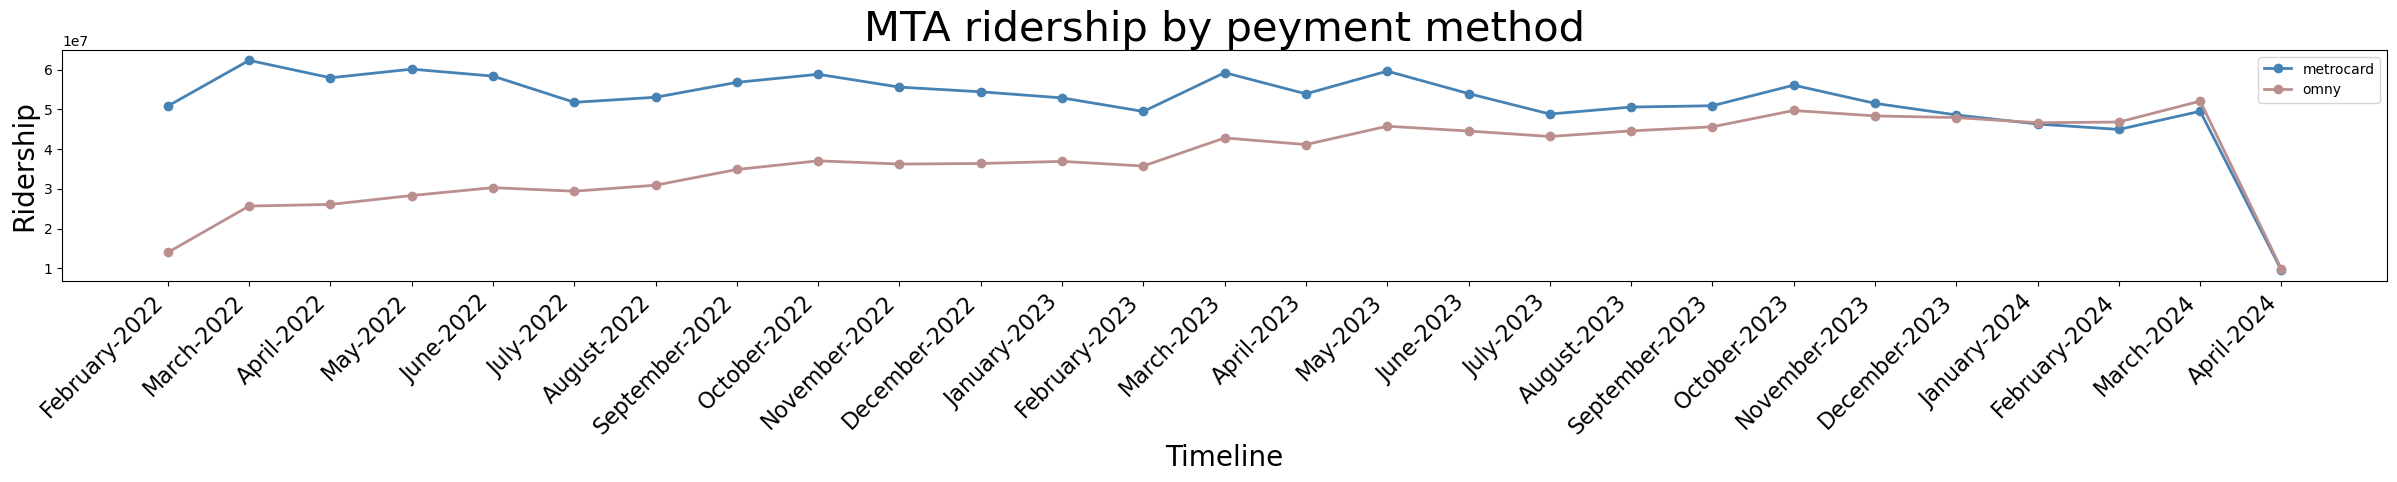

In [441]:
x_axis=grouped_month_metrocard["formatted_date"]
y_axis=grouped_month_metrocard["total_ridership"]

x1_axis=grouped_month_omny["formatted_date"]
y1_axis=grouped_month_omny["total_ridership"]
#plt.figure()
plt.figure(figsize=(30, 3))
metrocard=plt.plot(x_axis, y_axis, color="steelblue",marker="o", linewidth=2)
omny=plt.plot(x1_axis, y1_axis, color="rosybrown",marker="o", linewidth=2)
plt.xticks( rotation=45, ha='right',fontsize=16)
plt.title("MTA ridership by peyment method", fontsize=30)
plt.xlabel("Timeline", fontsize=20)
plt.ylabel("Ridership", fontsize=20)
plt.legend(grouped_month["payment_method"])
plt.savefig("Ressources/Fig4.png", bbox_inches = 'tight')
plt.show()